In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import all the necesry libraries and the data frame

In [ ]:
df=pd.read_csv(r"C:\Users\Lenovo\Documents\פייתון תרגולים\mini_project_1\laptop_price - dataset.csv")
# import the dataset
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


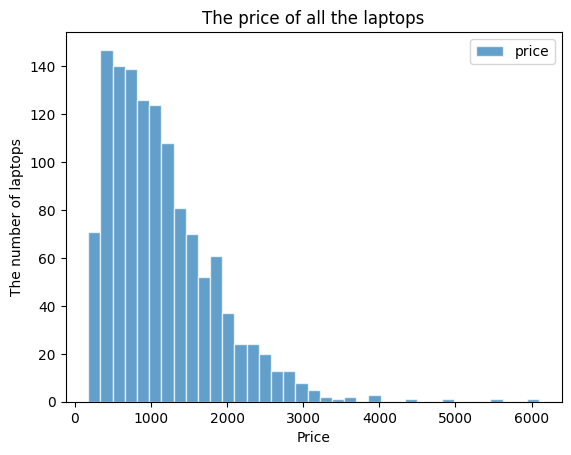

In [4]:
plt.hist(df["Price (Euro)"], bins='auto', alpha=0.7, label='price', edgecolor="white")
#create a historama
plt.xlabel('Price') 
plt.ylabel('The number of laptops')
#naming the axes
plt.legend() #create the legend
plt.title('The price of all the laptops')
plt.show()

In [28]:
mean_price=df.groupby('Company')['Price (Euro)'].mean() #finding the mean of each company
print(mean_price) #The mean prices of the company
most_exp_p=mean_price.max() #finding the company that has on average the most expensive laptop
most_exp_n=mean_price.idxmax() #finding the name of the company 
print(f"The company that has on average the most expensive laptop is {most_exp_n} and the average is {most_exp_p}")

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
The company that has on average the most expensive laptop is Razer and the average is 3346.1428571428573


In [6]:
opsys_name=df["OpSys"].unique() 
print(opsys_name)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [ ]:
opsys_map={"Mac OS X":'macOS','Windows 10 S':'Windows 10' } # if Windows 7 and 10 are diffrent 
df["uniform_OpSys"]= df["OpSys"].replace(opsys_map)
o_systems=df["uniform_OpSys"].unique() # finding the unique value
print("The different types of operating systems are:",", ".join(o_systems.astype(str))) #convert it to string

The different types of operating systems are: macOS, No OS, Windows 10, Linux, Android, Chrome OS, Windows 7


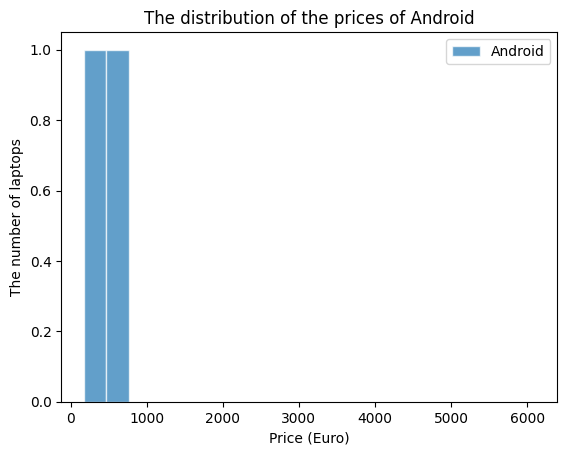

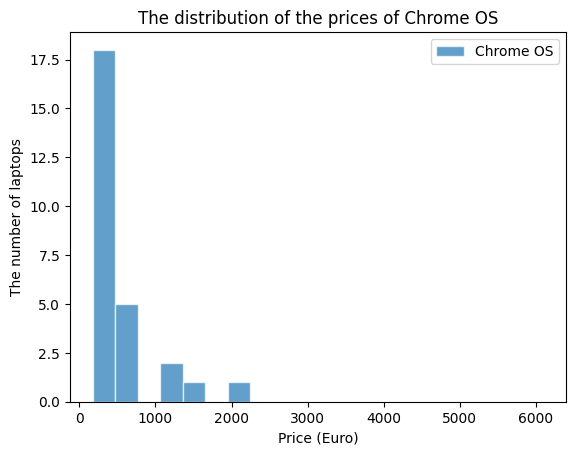

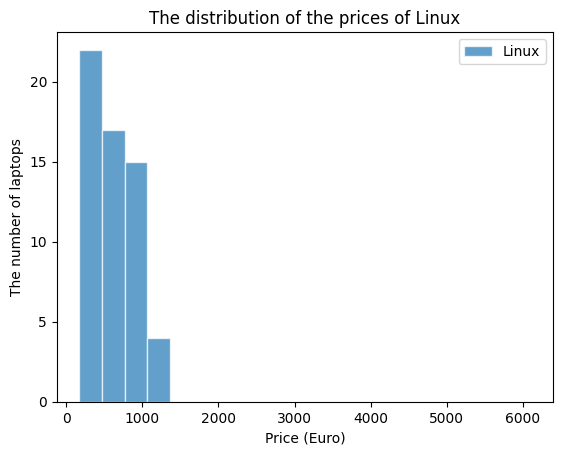

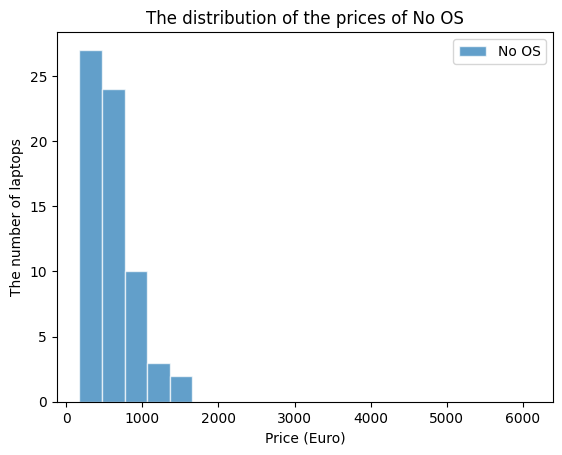

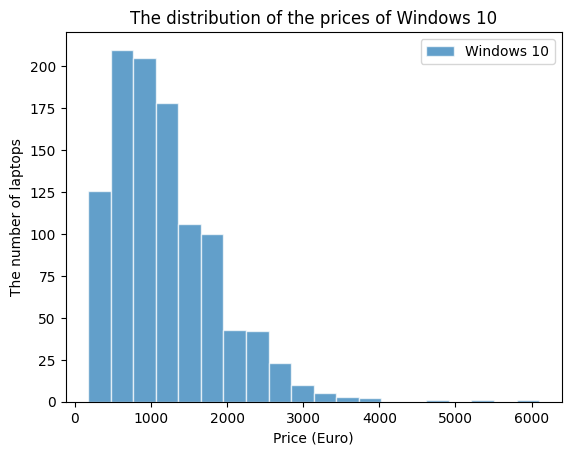

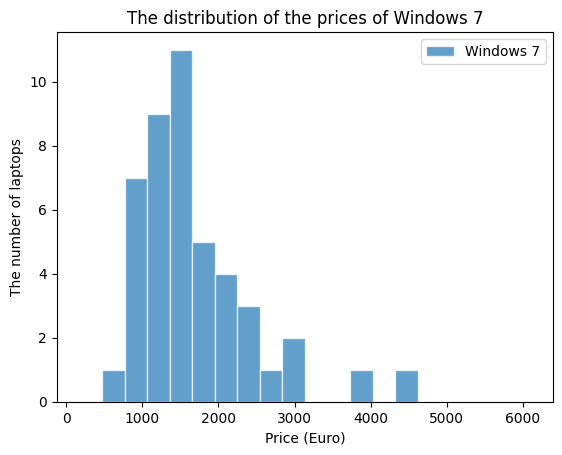

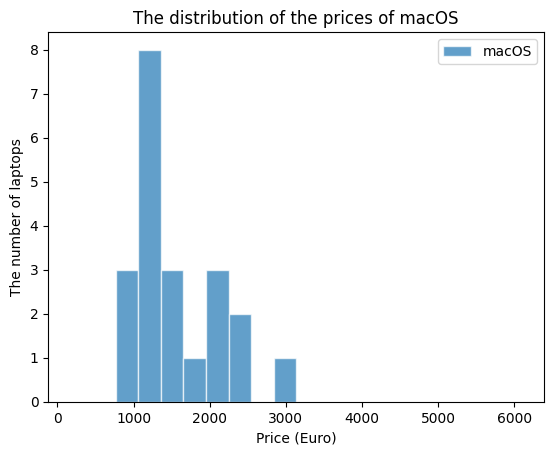

In [50]:
group_opsys=df.groupby("uniform_OpSys") #group by the opsys
min_p = df["Price (Euro)"].min()
max_p = df["Price (Euro)"].max()
# To create a constant range for X, so it would be easier to compare between the plots 
for opsys, group in group_opsys: # takes every opsys and it's data to creat each plot 
    plt.hist(group["Price (Euro)"], bins=20,range=(min_p, max_p), alpha=0.7, label=opsys, edgecolor="white") #creat histograma of the prices 
    plt.legend() #create the legend
    plt.xlabel("Price (Euro)")
    plt.ylabel("The number of laptops")
    plt.title(f"The distribution of the prices of {opsys}")
    plt.show()


 The correlation is 0.7402865271622701


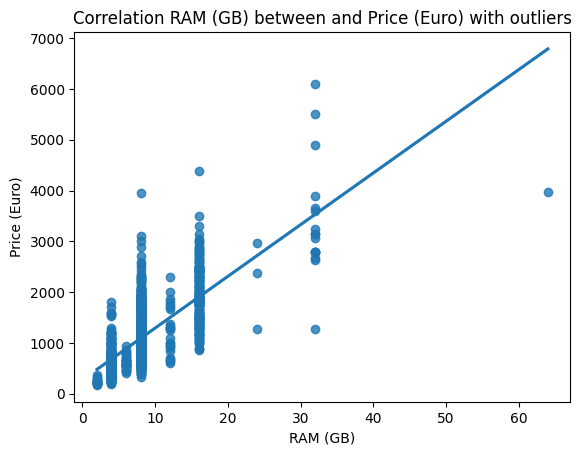

In [ ]:
cor_ram_price=df["RAM (GB)"].corr(df["Price (Euro)"], method='pearson') # calculate the correlation with pearson
print(f" The correlation is {cor_ram_price}")
sns.regplot(data=df, x="RAM (GB)", y="Price (Euro)", ci=None) #create plot of correlation
plt.title('Correlation RAM (GB) between and Price (Euro) with outliers')
plt.show() #plot with outliers

(array([1.031e+03, 2.500e+01, 1.980e+02, 3.000e+00, 1.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <BarContainer object of 10 artists>)

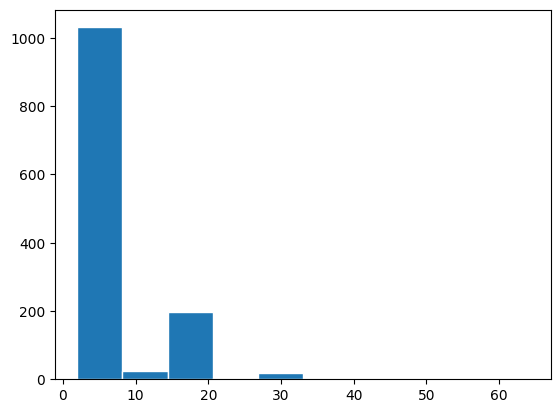

In [10]:
plt.hist(df["RAM (GB)"], edgecolor="white")
# The aim of the plot was to help me understand the type of the variable, which is discrete variable.

<function matplotlib.pyplot.show(close=None, block=None)>

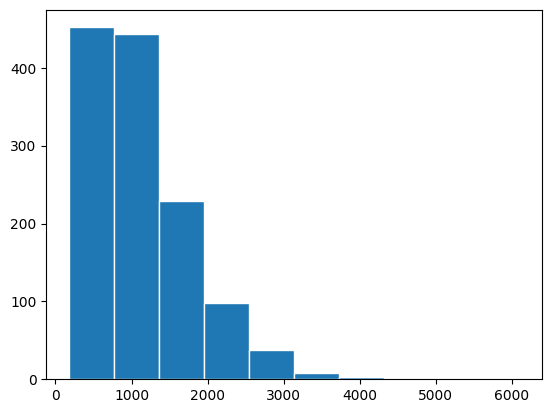

In [ ]:
plt.hist(df["Price (Euro)"], edgecolor="white")
plt.show
# The aim of the plot was to help me understand the distribution, which is right skewed. 

 The correlation is 0.7112912667486297


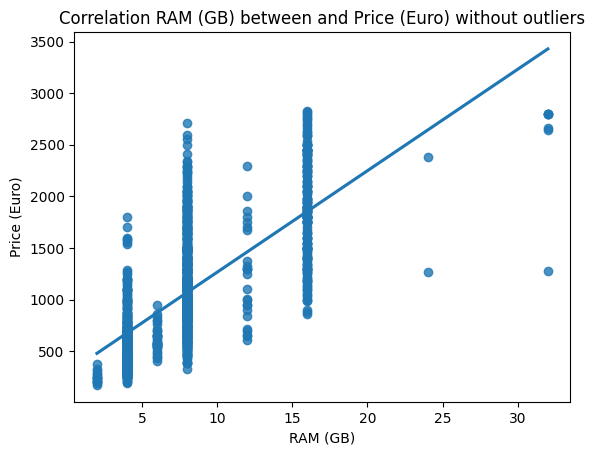

In [17]:
# To detect the outliers I used the The IQR method because the distribution is right skewed. Z score wont work in this case (the distribution isn't normal)
# Calculate percentiles
lower_percentile = df['Price (Euro)'].quantile(0.25) # The lower percentile of the data
upper_percentile = df['Price (Euro)'].quantile(0.75) # The upper percentile of the data
IQR = upper_percentile - lower_percentile # finding the Interquartile Range
# used the Tukey’s method for outlier detection
lower = lower_percentile - 1.5 * IQR  
upper = upper_percentile + 1.5 * IQR
price_without_outliers=df[(df["Price (Euro)"]>=lower) & (df["Price (Euro)"]<= upper)] # create a new data frame without the outliers
cor_ram_price=df["RAM (GB)"].corr(price_without_outliers["Price (Euro)"], method='pearson') # calculate the correlation with pearson
print(f" The correlation is {cor_ram_price}")
sns.regplot(data=price_without_outliers, x="RAM (GB)", y="Price (Euro)", ci=None) #create plot of correlation
plt.title('Correlation RAM (GB) between and Price (Euro) without outliers')
plt.show() #plot without outliers


In [27]:
df["Storage type"] = ( df["Memory"].str.replace(r"\d+(\.\d+)?\s?(GB|TB|MB)", "", regex=True).str.strip())
# This code creates a new column with the titel storge type. 
# This function can detect storage capacity that combains from numbers and letters that somtmes has space between them and replacd it with empty string.
df["Storage type"].head(25) #check the previous code
   

0               SSD
1     Flash Storage
2               SSD
3               SSD
4               SSD
5               HDD
6     Flash Storage
7     Flash Storage
8               SSD
9               SSD
10              HDD
11              HDD
12              SSD
13              SSD
14              SSD
15              SSD
16              SSD
17              SSD
18              HDD
19              SSD
20    Flash Storage
21      SSD +   HDD
22              HDD
23              SSD
24              SSD
Name: Storage type, dtype: object